In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.12.0
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 33.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninst

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2786, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _Distribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/

In [ ]:
import tensorflow
print(tensorflow.__version__)
import keras
print(keras.__version__)

2.12.0
2.12.0


In [ ]:

!pip install keras-applications==1.0.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.6 MB/s eta 0:00:00


In [ ]:
from __future__ import division, print_function
import os

import warnings

from keras import backend as K
from keras.layers import Input
from keras.layers import Activation, Dense, Flatten
from keras.layers import MaxPooling2D
from keras.models import Model
from keras.layers import Conv2D
from keras.regularizers import l2
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras_applications.imagenet_utils import _obtain_input_shape
#from keras.engine.topology import get_source_inputs
from keras.utils.layer_utils import get_source_inputs
from keras.utils.data_utils import get_file
from keras.utils import layer_utils
#from keras.engine import topology

WEIGHTS_PATH = 'https://github.com/GKalliatakis/Keras-VGG16-places365/releases/download/v1.0/vgg16-hybrid1365_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/GKalliatakis/Keras-VGG16-places365/releases/download/v1.0/vgg16-hybrid1365_weights_tf_dim_ordering_tf_kernels_notop.h5'


def VGG16_Hybrid_1365(include_top=True, weights='imagenet',
                      input_tensor=None, input_shape=None,
                      pooling=None,
                      classes=1365):

    if not (weights in {'places', None} or os.path.exists(weights)):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), `places` '
                         '(pre-training on Places), '
                         'or the path to the weights file to be loaded.')

    if weights == 'places' and include_top and classes != 1365:
        raise ValueError('If using `weights` as places with `include_top`'
                         ' as true, `classes` should be 1365')


    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top)


    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor



    # Block 1
    x = Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block1_conv1')(img_input)

    x = Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block1_conv2')(x)

    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block1_pool", padding='valid')(x)



    # Block 2
    x = Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block2_conv1')(x)

    x = Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block2_conv2')(x)

    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block2_pool", padding='valid')(x)



    # Block 3
    x = Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block3_conv1')(x)

    x = Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block3_conv2')(x)

    x = Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block3_conv3')(x)

    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block3_pool", padding='valid')(x)



    # Block 4
    x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block4_conv1')(x)

    x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block4_conv2')(x)

    x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block4_conv3')(x)

    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block4_pool", padding='valid')(x)



    # Block 5
    x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block5_conv1')(x)

    x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block5_conv2')(x)

    x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block5_conv3')(x)

    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block5_pool", padding='valid')(x)



    if include_top:
        # Classification block
        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dropout(0.5, name='drop_fc1')(x)

        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dropout(0.5, name='drop_fc2')(x)

        x = Dense(1365, activation='softmax', name='predictions')(x)

    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input


    # Create model.
    model = Model(inputs, x, name='vgg16-hybrid1365')

    # load weights
    if weights == 'places':
        if include_top:
            weights_path = get_file('vgg16-hybrid1365_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models')
        else:
            weights_path = get_file('vgg16-hybrid1365_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models')

        model.load_weights(weights_path)

        if K.backend() == 'theano':
            layer_utils.convert_all_kernels_in_model(model)

        if K.image_data_format() == 'channels_first':
            if include_top:
                maxpool = model.get_layer(name='block5_pool')
                shape = maxpool.output_shape[1:]
                dense = model.get_layer(name='fc1')
                layer_utils.convert_dense_weights_data_format(dense, shape, 'channels_first')

            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')


    elif weights is not None:
        model.load_weights(weights)

    model.save('/content/drive/MyDrive/model0.h5')

    return model

In [ ]:
from keras.engine import base_layer_v1

ModuleNotFoundError: No module named 'keras.engine'

In [ ]:
#Import Necessary Libraries
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
#from keras.preprocessing.image import load_img
from keras.utils import load_img, img_to_array
#from keras.preprocessing.image import img_to_array
#from keras.applications.vgg16 import preprocess_input
from keras.models import Model

from tensorflow import keras
#from keras.engine import *
#from keras.src import engine
#from tensorflow.python.keras.engine import base_layer_v1

# extract features from each photo in the directory
def extract_features(directory):
    # load the model
    model = VGG16_Hybrid_1365(weights='places')
    # re-structure the model
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # summarize
    print(model.summary())
    # extract features from each photo
    features = dict()
    for name in listdir(directory):
        # load an image from file
        filename = directory + '/' + name
        image = load_img(filename, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        #image = preprocess_input(image)
        # get features
        feature = model.predict(image, verbose=0)
        # get image id
        image_id = name.split('.')[0]
        # store feature
        features[image_id] = feature
        print(len(features) ,':', name)
    return features

# extract features from all images
directory = '/content/drive/MyDrive/archive/Images'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('/content/drive/MyDrive/archive/features.pkl', 'wb'))

559473444/559473444 [==============================] - 7s 0us/step


Streaming output truncated to the last 5000 lines.
2424 : 3415646718_f9f4e23a66.jpg
2425 : 341665272_80d4d61376.jpg
2426 : 3415809168_af9dabdba5.jpg
2427 : 3417102649_5c0b2f4b4d.jpg
2428 : 3419197575_aa5b84a9f0.jpg
2429 : 3420323191_d66e003264.jpg
2430 : 3419916411_72934edcdb.jpg
2431 : 3418504074_083f0bb68d.jpg
2432 : 3421928157_69a325366f.jpg
2433 : 3417672954_46b75dea8d.jpg
2434 : 3421706363_a3e22a4908.jpg
2435 : 3421547427_53411b6278.jpg
2436 : 3417662443_2eaea88977.jpg
2437 : 3421480658_b3518b6819.jpg
2438 : 3419634480_c390f62a6e.jpg
2439 : 3421131122_2e4bde661e.jpg
2440 : 3419238351_ac18b440c0.jpg
2441 : 3420469425_2980b4cd30.jpg
2442 : 3420064875_0349a75d69.jpg
2443 : 3417788829_cfdbc34d2c.jpg
2444 : 3417231408_6ce951c011.jpg
2445 : 3417143124_6feb8290cc.jpg
2446 : 3421177332_a05741cfa4.jpg
2447 : 3421104520_6a71185b3c.jpg
2448 : 3421789737_f625dd17ed.jpg
2449 : 3422394336_e465f60b7c.jpg
2450 : 3420338549_bd78d35243.jpg
2451 : 3422219732_3d0be52cc3.jpg
2452 : 3421129418_088af794

In [ ]:
import string

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# extract descriptions for images
def load_descriptions(doc):
    mapping = dict()
    # process lines
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        if len(line) < 2:
            continue
        # take the first token as the image id, the rest as the description
        image_id, image_desc = tokens[0], tokens[1:]
        # remove filename from image id
        image_id = image_id.split('.')[0]
        # convert description tokens back to string
        image_desc = ' '.join(image_desc)
        # create the list if needed
        if image_id not in mapping:
            mapping[image_id] = list()
        # store description
        mapping[image_id].append(image_desc)
    return mapping

def clean_descriptions(descriptions):
    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    for key, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]
            # tokenize
            desc = desc.split()
            # convert to lower case
            desc = [word.lower() for word in desc]
            # remove punctuation from each token
            desc = [w.translate(table) for w in desc]
            # remove hanging 's' and 'a'
            desc = [word for word in desc if len(word)>1]
            # remove tokens with numbers in them
            desc = [word for word in desc if word.isalpha()]
            # store as string
            desc_list[i] =  ' '.join(desc)

# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
    # build a list of all description strings
    all_desc = set()
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc

# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + ' ' + desc)
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

# filename = 'Flickr8k_text/Flickr8k.token.txt'
filename = '/content/drive/MyDrive/Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))
# clean descriptions
clean_descriptions(descriptions)
# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
# save to file
save_descriptions(descriptions, '/content/drive/MyDrive/descriptions.txt')

Loaded: 8092 
Vocabulary Size: 8763


In [ ]:
from pickle import load

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# load a pre-defined list of photo identifiers
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # skip images not in the set
        if image_id in dataset:
            # create list
            if image_id not in descriptions:
                descriptions[image_id] = list()
            # wrap description in tokens
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            # store
            descriptions[image_id].append(desc)
    return descriptions

# load photo features
def load_photo_features(filename, dataset):
    # load all features
    all_features = load(open(filename, 'rb'))
    # filter features
    features = {k: all_features[k] for k in dataset}
    #features = {key: all_features[key] for key in dataset if key in all_features}
    #features = {filename.split('.')[0]: all_features[filename] for filename in dataset}
    return features

# load training dataset (6K)
#filename = '/content/drive/MyDrive/ICG/Flickr8k/Flickr_8k.trainImages.txt'
filename = '/content/drive/MyDrive/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
#train_descriptions = load_clean_descriptions('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/descriptions.txt', train)
train_descriptions = load_clean_descriptions('/content/drive/MyDrive/descriptions.txt', train)
print('Descriptions train: =%d' % len(train_descriptions))
# photo features
#train_features = load_photo_features('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/features.pkl', train)
train_features = load_photo_features('/content/drive/MyDrive/archive/features.pkl', train)
print('Photos train: =%d' % len(train_features))

Dataset: 6000
Descriptions train: =6000
Photos train: =6000


In [ ]:
from numpy import array
import numpy
import tensorflow
from pickle import load
from keras.preprocessing.text import Tokenizer
#from kerasp_reprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
#from keras.layers.merge import add
from keras.layers.merging import add,concatenate
from keras.callbacks import ModelCheckpoint




# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# load a pre-defined list of photo identifiers
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # skip images not in the set
        if image_id in dataset:
            # create list
            if image_id not in descriptions:
                descriptions[image_id] = list()
            # wrap description in tokens
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            # store
            descriptions[image_id].append(desc)
    return descriptions

# load photo features
def load_photo_features(filename, dataset):
    # load all features
    all_features = load(open(filename, 'rb'))
    # filter features
    k=1
    features = {k: all_features[k] for k in dataset}
    return features



# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer



# calculate the length of the description with the most words
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, desc_list, photo):
    X1, X2, y = list(), list(), list()
    # walk through each description for the image
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # store
            X1.append(photo)
            X2.append(in_seq)
            y.append(out_seq)
    return array(X1), array(X2), array(y)

# define the captioning model
def define_model(vocab_size, max_length):
    # feature extractor model
    inputs1 = Input(shape=(4096,))
    fe1 = Dropout(0.2)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)
    # sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.2)(se1)
    se3 = LSTM(256)(se2)
    # decoder model
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize model
    print(model.summary())


    return model



#Below code is used to progressively load the batch of data
# data generator, intended to be used in a call to model.fit_generator()

def data_generator(descriptions, photos, tokenizer, max_length):
    # loop for ever over images
    while 1:
        for key, desc_list in descriptions.items():
            # retrieve the photo feature
            photo = photos[key][0]
            in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc_list, photo)
            yield [[in_img, in_seq], out_word]


#filename = '/content/drive/MyDrive/ICG/Flickr8k/Flickr_8k.trainImages.txt'
filename = '/content/drive/MyDrive/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
#train_descriptions = load_clean_descriptions('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/descriptions.txt', train)
train_descriptions = load_clean_descriptions('/content/drive/MyDrive/descriptions.txt', train)
print('Descriptions train: =%d' % len(train_descriptions))
# photo features
#train_features = load_photo_features('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/features.pkl', train)
train_features = load_photo_features('/content/drive/MyDrive/archive/features.pkl', train)
print('Photos train: =%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# train the model
model = define_model(vocab_size, max_length)

# train the model, run epochs manually and save after each epoch
epochs = 10
steps = len(train_descriptions)
for i in range(epochs):
    # create the data generator
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
    # fit for one epoch
    model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    # save model
    print("Epoch " + str(i+1) + ' saved')
    model.save('/content/drive/MyDrive/archive/model' + str(i+1) + '.h5')

Dataset: 6000
Descriptions train: =6000
Photos train: =6000
Vocabulary Size: 7579
Description Length: 34
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 34, 256)      1940224     ['input_8[0][0]']                
                                                                                                  
 dropout_6 (Dropout)            (None, 4096)         0           ['input_7[0][0]']    

In [ ]:
pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.4 MB/s eta 0:00:00


In [ ]:
pip install sequence

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for sequence: filename=sequence-0.3.4-py3-none-any.whl size=5396 sha256=8747c12e72aee4679fd5ae34d9cf20707e74f6dd337a61d77f81cfb9a91eaa53
  Stored in directory: /root/.cache/pip/wheels/4c/bd/44/af4ff25940a673c359d905591bad7468270108e1d2255bd720
  Created wheel for daytime: filename=daytime-0.4-py3-none-any.whl size=2401 sha256=3daf4906d5bf4b0a896a8a52525c13f99bbfbf41b38674a611c4cad8fc8ab5c3
  Stored in directory: /root/.cache/pip/wheels/cd/40/c7/fc109bc6716d31e4d5fdc0cd72891253fa46032e71d9aa1b93
Successfully built sequence daytime


In [ ]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from keras.models import load_model
#from collections import Sequence
from nltk.translate.bleu_score import corpus_bleu
#from collections import Sequence




# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer



# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc]
		actual.append(references)
		predicted.append(yhat.split())
		#print('Actual:    %s' % desc)
		#print('Predicted: %s' % yhat)
		if len(actual) >= 5:
			break
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))


# prepare training set

# load training dataset (6K)
#filename = '/content/drive/MyDrive/ICG/Flickr8k/Flickr_8k.trainImages.txt'
filename = '/content/drive/MyDrive/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Training Dataset: %d' % len(train))
# descriptions
#train_descriptions = load_clean_descriptions('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/descriptions.txt', train)
train_descriptions = load_clean_descriptions('/content/drive/MyDrive/descriptions.txt', train)
print('Descriptions train: =%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)


# prepare test set

# load test set
filename = '/content/drive/MyDrive/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Testing Dataset: %d' % len(test))
# descriptions
#test_descriptions = load_clean_descriptions('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/descriptions.txt', test)
test_descriptions = load_clean_descriptions('/content/drive/MyDrive/descriptions.txt', test)
print('Descriptions test: =%d' % len(test_descriptions))
# photo features
#test_features = load_photo_features('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/features.pkl', test)
test_features = load_photo_features('/content/drive/MyDrive/archive/features.pkl', test)

print('Photos test: =%d' % len(test_features))

# load the model which has minimum loss, in this case it was model_1
models = 9
#models = 7

for i in range(models):
		# load the model which has minimum loss, in this case it was model_1
		print('BLEU Score of epoch ' + str(i+1) )
		#filename = '/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/0.5/model' + str(i+1) + '.h5'
		filename = '/content/drive/MyDrive/archive/model' + str(i+1) + '.h5'
		model = load_model(filename)
		# evaluate model
		evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)


Training Dataset: 6000
Descriptions train: =6000
Vocabulary Size: 7579
Description Length: 34
Testing Dataset: 1000
Descriptions test: =1000
Photos test: =1000
BLEU Score of epoch 1


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BLEU-1: 0.603774
BLEU-2: 0.388514
BLEU-3: 0.244706
BLEU-4: 0.000000
BLEU Score of epoch 2
BLEU-1: 0.588235
BLEU-2: 0.357599
BLEU-3: 0.235344
BLEU-4: 0.000000
BLEU Score of epoch 3
BLEU-1: 0.627451
BLEU-2: 0.350374
BLEU-3: 0.211165
BLEU-4: 0.000000
BLEU Score of epoch 4
BLEU-1: 0.588119
BLEU-2: 0.357918
BLEU-3: 0.214444
BLEU-4: 0.000000
BLEU Score of epoch 5
BLEU-1: 0.596154
BLEU-2: 0.390140
BLEU-3: 0.247294
BLEU-4: 0.000000
BLEU Score of epoch 6
BLEU-1: 0.543478
BLEU-2: 0.257445
BLEU-3: 0.125162
BLEU-4: 0.000000
BLEU Score of epoch 7
BLEU-1: 0.596154
BLEU-2: 0.373531
BLEU-3: 0.240294
BLEU-4: 0.000000
BLEU Score of epoch 8
BLEU-1: 0.541546
BLEU-2: 0.317774
BLEU-3: 0.177865
BLEU-4: 0.000000
BLEU Score of epoch 9
BLEU-1: 0.476190
BLEU-2: 0.256284
BLEU-3: 0.138065
BLEU-4: 0.000000


In [ ]:
!pip uninstall nltk

Found existing installation: nltk 3.8.1
Uninstalling nltk-3.8.1:
  Would remove:
    /root/.local/bin/nltk
    /root/.local/lib/python3.10/site-packages/nltk-3.8.1.dist-info/*
    /root/.local/lib/python3.10/site-packages/nltk/*
Proceed (Y/n)? y
  Successfully uninstalled nltk-3.8.1


In [ ]:
!pip install rouge
#!pip install nltk==3.4.5
!pip install nltk
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
#from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
import nltk
from rouge import Rouge


# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer



# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None



# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text





def evaluate_ROUGE(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		#references = [d.split() for d in desc]
		#actual.join(references)
		actual = desc
		predicted = yhat
		#predicted.join(yhat)

		#print('Actual:    %s' %actual)
		#print('Predected:  %s' %predicted)
		if len(actual) >= 5:
			break


	# calculate ROUGE score
	rouge = Rouge()
	scores = rouge.get_scores(predicted, ", ".join(actual), avg=True)
	print('ROUGE: ', scores)


def evaluate_METEOR(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = '',''
	# step over the whole set

	for key, desc in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		#references = [d.split() for d in desc]
		#actual.join(references)
		actual = desc
		predicted = yhat
		#predicted.join(yhat)


		#print('Actual:    %s' %actual)
		#print('Predected:  %s' %predicted)
		if len(actual) >= 5:
			break


		# calculate METEOR score
		print('METEOR: %f' % nltk.translate.meteor_score.meteor_score(actual, predicted))


# prepare training set

# load training dataset (6K)
#filename = '/content/drive/MyDrive/ICG/Flickr8k/Flickr_8k.trainImages.txt'
filename = '/content/drive/MyDrive/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Training Dataset: %d' % len(train))
# descriptions
#train_descriptions = load_clean_descriptions('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/descriptions.txt', train)
train_descriptions = load_clean_descriptions('/content/drive/MyDrive/descriptions.txt', train)
print('Descriptions train: =%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)


# prepare test set

# load test set
#filename = '/content/drive/MyDrive/ICG/Flickr8k/Flickr_8k.testImages.txt'
filename = '/content/drive/MyDrive/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Testing Dataset: %d' % len(test))
# descriptions
#test_descriptions = load_clean_descriptions('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/descriptions.txt', test)
test_descriptions = load_clean_descriptions('/content/drive/MyDrive/descriptions.txt', test)
print('Descriptions test: =%d' % len(test_descriptions))
# photo features
#test_features = load_photo_features('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/features.pkl', test)
test_features = load_photo_features('/content/drive/MyDrive/archive/features.pkl', test)
print('Photos test: =%d' % len(test_features))

# load the model which has minimum loss, in this case it was model_1
models = 10
for i in range(models):
  # load the model which has minimum loss, in this case it was model_1
  filename = '/content/drive/MyDrive/archive/model' + str(i+1) + '.h5'
  model = load_model(filename)
  # evaluate model
  print('METEOR Score of epoch ' + str(i+1) )
  evaluate_METEOR(model, test_descriptions, test_features, tokenizer, max_length)
  print('ROUGE Score of epoch ' + str(i+1) )
  evaluate_ROUGE(model, test_descriptions, test_features, tokenizer, max_length)




Training Dataset: 6000
Descriptions train: =6000
Vocabulary Size: 7579
Description Length: 34
Testing Dataset: 1000
Descriptions test: =1000
Photos test: =1000
METEOR Score of epoch 1
ROUGE Score of epoch 1
ROUGE:  {'rouge-1': {'r': 0.1951219512195122, 'p': 0.7272727272727273, 'f': 0.3076923043565089}, 'rouge-2': {'r': 0.03508771929824561, 'p': 0.2, 'f': 0.05970148999777244}, 'rouge-l': {'r': 0.1951219512195122, 'p': 0.7272727272727273, 'f': 0.3076923043565089}}
METEOR Score of epoch 2
ROUGE Score of epoch 2
ROUGE:  {'rouge-1': {'r': 0.1951219512195122, 'p': 0.7272727272727273, 'f': 0.3076923043565089}, 'rouge-2': {'r': 0.03508771929824561, 'p': 0.2, 'f': 0.05970148999777244}, 'rouge-l': {'r': 0.1951219512195122, 'p': 0.7272727272727273, 'f': 0.3076923043565089}}
METEOR Score of epoch 3
ROUGE Score of epoch 3
ROUGE:  {'rouge-1': {'r': 0.1951219512195122, 'p': 0.7272727272727273, 'f': 0.3076923043565089}, 'rouge-2': {'r': 0.03508771929824561, 'p': 0.2, 'f': 0.05970148999777244}, 'rouge-

OSError: No file or directory found at /content/drive/MyDrive/archive/model10.h5

In [ ]:
from keras.preprocessing.text import Tokenizer
from pickle import dump


# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions


# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# load training dataset (6K)
#filename = '/content/drive/MyDrive/ICG/Flickr8k/Flickr_8k.trainImages.txt'
filename = '/content/drive/MyDrive/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
#train_descriptions = load_clean_descriptions('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/descriptions.txt', train)
train_descriptions = load_clean_descriptions('/content/drive/MyDrive/descriptions.txt', train)
print('Descriptions train: =%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
#dump(tokenizer, open('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/tokenizer.pkl', 'wb'))
dump(tokenizer, open('/content/drive/MyDrive/archive/tokenizer.pkl', 'wb'))
print('Tokenizer.pkl file save....')



Dataset: 6000
Descriptions train: =6000
Tokenizer.pkl file save....


In [ ]:
#Generate Captions for a Fresh Image

from pickle import load
from numpy import argmax
from keras.utils import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.utils import load_img
from keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model

# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	#model = VGG16()
	model = VGG16_Hybrid_1365(weights='places')

	#model = load_model('/content/drive/MyDrive/archive/model1.h5')
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature



def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# load the tokenizer
#tokenizer = load(open('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/tokenizer.pkl', 'rb'))
tokenizer = load(open('/content/drive/MyDrive/archive/tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
#model = load_model('/content/drive/MyDrive/ICG/VGG16_hybrid_places_1365_with_LSTM/0.5/model1.h5')
model = load_model('/content/drive/MyDrive/archive/model1.h5')
# load and prepare the photograph
#photo = extract_features('/content/drive/MyDrive/ICG/example.jpg')
photo = extract_features('/content/drive/MyDrive/archive/3637013_c675de7705.jpg')
# generate description
description = generate_desc(model, tokenizer, photo, max_length)
print("Caption of example image: ")
print(description)

#Remove startseq and endseq
query = description
stopwords = ['startseq','endseq']
querywords = query.split()

resultwords  = [word for word in querywords if word.lower() not in stopwords]
result = ' '.join(resultwords)

print("Clean Caption of image: ")
print(result)


559473444/559473444 [==============================] - 11s 0us/step


Caption of example image: 
startseq man in red shirt is sitting on the water endseq
Clean Caption of image: 
man in red shirt is sitting on the water


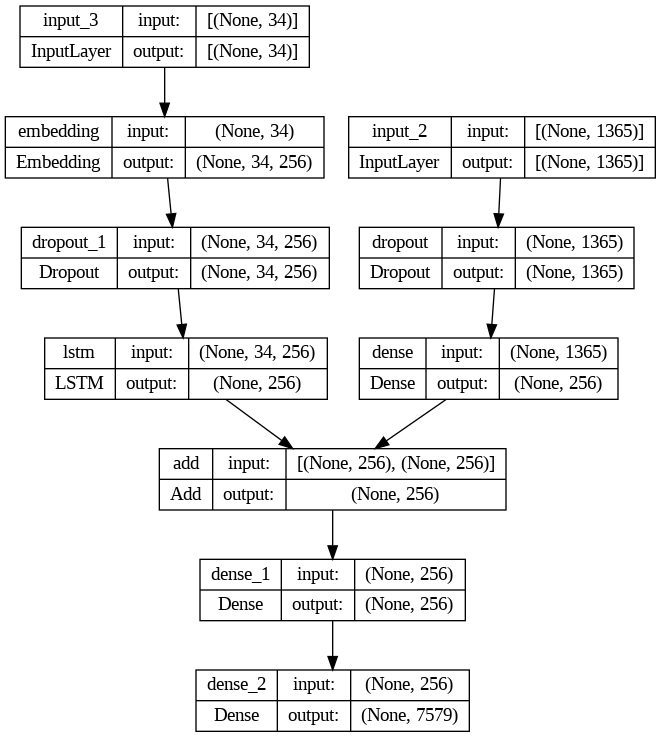

In [ ]:
from tensorflow.keras.utils import to_categorical, plot_model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/archive/model2.h5')
plot_model(model, show_shapes=True)

In [ ]:
!pip install transformers

In [ ]:
!pip install torch

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [ ]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

In [ ]:

def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

In [ ]:
predict_step(["/content/drive/MyDrive/car.jpg"])

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


['a blue car is parked on a sandy beach']

In [ ]:
from os import listdir
from pickle import dump
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
dump(model,open('/content/drive/MyDrive/image caption/image-caption-generation-vgg16/archive/model.h5','wb'))
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
dump(feature_extractor, open('/content/drive/MyDrive/image caption/image-caption-generation-vgg16/archive/features.pkl', 'wb'))
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
dump(tokenizer, open('/content/drive/MyDrive/image caption/image-caption-generation-vgg16/archive/tokenizer.pkl', 'wb'))

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [ ]:
#max_length = 10
#num_beams = 4
#gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
len = {"max_length": 10}

In [ ]:
from pickle import load
import torch
from PIL import Image
model = load(open('/content/drive/MyDrive/image caption/image-caption-generation-vgg16/archive/model.h5','rb'))
feature_extractor = load(open('/content/drive/MyDrive/image caption/image-caption-generation-vgg16/archive/features.pkl', 'rb'))
tokenizer = load(open('/content/drive/MyDrive/image caption/image-caption-generation-vgg16/archive/tokenizer.pkl', 'rb'))
len = {"max_length": 10}
def generate_desc(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  #device = torch.device("cpu")
  #model.to(device)
  #pixel_values = pixel_values.to(device)

  #output_ids = model.generate(pixel_values, **gen_kwargs)
  output_ids = model.generate(pixel_values,  **len)

  caption_generated = tokenizer.batch_decode(output_ids,skip_special_tokens=True)

  caption_generated = [caps.strip() for caps in caption_generated]
  return  caption_generated

In [ ]:
caption=generate_desc(["/content/drive/MyDrive/girl.jpg"])
print(caption)


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


['a young girl in a pink dress holding flowers']


In [ ]:
from vgg16_hybrid_places_1365 import VGG16_Hybrid_1365

ModuleNotFoundError: No module named 'vgg16_hybrid_places_1365'

In [ ]:
!pip install vgg16_hybrid_places_1365

ERROR: Could not find a version that satisfies the requirement vgg16_hybrid_places_1365 (from versions: none)
ERROR: No matching distribution found for vgg16_hybrid_places_1365


In [ ]:
from __future__ import division, print_function
import os

import warnings

from keras import backend as K
from keras.layers import Input
from keras.layers.core import Activation, Dense, Flatten
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
from keras.layers import Conv2D
from keras.regularizers import l2
from keras.layers.core import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras_applications.imagenet_utils import _obtain_input_shape
#from keras.engine.topology import get_source_inputs
from keras.utils.layer_utils import get_source_inputs
from keras.utils.data_utils import get_file
from keras.utils import layer_utils
from pickle import load

WEIGHTS_PATH = 'https://github.com/GKalliatakis/Keras-VGG16-places365/releases/download/v1.0/vgg16-hybrid1365_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/GKalliatakis/Keras-VGG16-places365/releases/download/v1.0/vgg16-hybrid1365_weights_tf_dim_ordering_tf_kernels_notop.h5'


def VGG16_Hybrid_1365(include_top=True, weights='places',
                      input_tensor=None, input_shape=None,
                      pooling=None,
                      classes=1365):
    """Instantiates the VGG-ImageNetPlaces365-hybrid architecture.

    Optionally loads weights pre-trained
    on Places. Note that when using TensorFlow,
    for best performance you should set
    `image_data_format="channels_last"` in your Keras config
    at ~/.keras/keras.json.

    The model and the weights are compatible with both
    TensorFlow and Theano. The data format
    convention used by the model is the one
    specified in your Keras config file.

    # Arguments
        include_top: whether to include the 3 fully-connected
            layers at the top of the network.
        weights: one of `None` (random initialization),
                 'places' (pre-training on Places),
                 or the path to the weights file to be loaded.
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is False (otherwise the input shape
            has to be `(224, 224, 3)` (with `channels_last` data format)
            or `(3, 224, 244)` (with `channels_first` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 48.
            E.g. `(200, 200, 3)` would be one valid value.
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional layer.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is True, and
            if no `weights` argument is specified.
    # Returns
        A Keras model instance.
    # Raises
        ValueError: in case of invalid argument for `weights`, or invalid input shape
        """

    if not (weights in {'places', None} or os.path.exists(weights)):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), `places` '
                         '(pre-training on Places), '
                         'or the path to the weights file to be loaded.')

    if weights == 'places' and include_top and classes != 1365:
        raise ValueError('If using `weights` as places with `include_top`'
                         ' as true, `classes` should be 1365')


    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top)


    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor



    # Block 1
    x = Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block1_conv1')(img_input)

    x = Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block1_conv2')(x)

    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block1_pool", padding='valid')(x)



    # Block 2
    x = Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block2_conv1')(x)

    x = Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block2_conv2')(x)

    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block2_pool", padding='valid')(x)



    # Block 3
    x = Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block3_conv1')(x)

    x = Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block3_conv2')(x)

    x = Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block3_conv3')(x)

    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block3_pool", padding='valid')(x)



    # Block 4
    x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block4_conv1')(x)

    x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block4_conv2')(x)

    x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block4_conv3')(x)

    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block4_pool", padding='valid')(x)



    # Block 5
    x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block5_conv1')(x)

    x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block5_conv2')(x)

    x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding='same',
                     kernel_regularizer=l2(0.0002),
                     activation='relu', name='block5_conv3')(x)

    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block5_pool", padding='valid')(x)



    if include_top:
        # Classification block
        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dropout(0.5, name='drop_fc1')(x)

        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dropout(0.5, name='drop_fc2')(x)

        x = Dense(1365, activation='softmax', name='predictions')(x)

    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input


    # Create model.
    model = Model(inputs, x, name='vgg16-hybrid1365')

    # load weights
    if weights == 'places':
        if include_top:
            weights_path = get_file('vgg16-hybrid1365_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models')
        else:
            weights_path = get_file('vgg16-hybrid1365_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models')

        model.load_weights(weights_path)

        if K.backend() == 'theano':
            layer_utils.convert_all_kernels_in_model(model)

        if K.image_data_format() == 'channels_first':
            if include_top:
                maxpool = model.get_layer(name='block5_pool')
                shape = maxpool.output_shape[1:]
                dense = model.get_layer(name='fc1')
                layer_utils.convert_dense_weights_data_format(dense, shape, 'channels_first')

            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')


    elif weights is not None:
        model.load_weights(weights)



    return model


if __name__ == '__main__':
    #import urllib2
    from urllib.request import urlopen
    import numpy as np
    from PIL import Image
    from cv2 import resize

    #TEST_IMAGE_URL = load(open('/content/drive/MyDrive/image caption/image-caption-generation-vgg16/archive/model.h5'))

    image = Image.open('/content/drive/MyDrive/archive/3637013_c675de7705.jpg')
    image = np.array(image, dtype=np.uint8)
    image = resize(image, (224, 224))
    image = np.expand_dims(image, 0)

    model = VGG16_Hybrid_1365(weights='places')
    predictions_to_return = 5
    preds = model.predict(image)[0]
    top_preds = np.argsort(preds)[::-1][0:predictions_to_return]

    # load the class label
    file_name = 'categories_hybrid1365.txt'
    if not os.access(file_name, os.W_OK):
        synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_hybrid1365.txt'
        os.system('wget ' + synset_url)
    classes = list()
    counter = 0
    with open(file_name) as class_file:
        for line in class_file:
            if counter <=999:
                tmp = line[9:]

                if 0 <= counter <= 9:
                    tmp = tmp[:-2]
                elif 10 <= counter <= 99:
                    tmp = tmp[:-3]
                elif 100 <= counter <= 999:
                    tmp = tmp[:-4]

                classes.append(tmp)

            else:
                classes.append(line.strip().split(' ')[0][3:])

            counter +=1
    classes = tuple(classes)


    print('--PREDICTED SCENE CATEGORIES:')
    # output the prediction
    for i in range(0, 5):
        print(classes[top_preds[i]])


1/1 [==============================] - 1s 754ms/step
--PREDICTED SCENE CATEGORIES:
 lakeside, lakeshore 
 suspension bridge 
 boathouse 
 canoe 
 valley, vale 
